In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np

In [26]:
train_transaction = pd.read_csv('/Users/nadinegan/Desktop/Y3S2/DSA4263/ieee-fraud-detection/train_transaction.csv')
train_identity = pd.read_csv('/Users/nadinegan/Desktop/Y3S2/DSA4263/ieee-fraud-detection/train_identity.csv')
test_transaction = pd.read_csv('/Users/nadinegan/Desktop/Y3S2/DSA4263/ieee-fraud-detection/test_transaction.csv')
test_identity = pd.read_csv('/Users/nadinegan/Desktop/Y3S2/DSA4263/ieee-fraud-detection/test_identity.csv')

In [27]:
train_transaction = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)

In [28]:
test_transaction = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

In [29]:
print(train_transaction["TransactionDT"])
print(train_transaction["M2"])

0            86400
1            86401
2            86469
3            86499
4            86506
            ...   
590535    15811047
590536    15811049
590537    15811079
590538    15811088
590539    15811131
Name: TransactionDT, Length: 590540, dtype: int64
0           T
1         NaN
2           T
3         NaN
4         NaN
         ... 
590535      T
590536      F
590537      F
590538      T
590539      F
Name: M2, Length: 590540, dtype: object


In [30]:
print(train_identity.head())

   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                  

In [31]:
import seaborn as sns

In [32]:
print(train_transaction.columns)

Index(['TransactionID_x', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=435)


<Axes: >

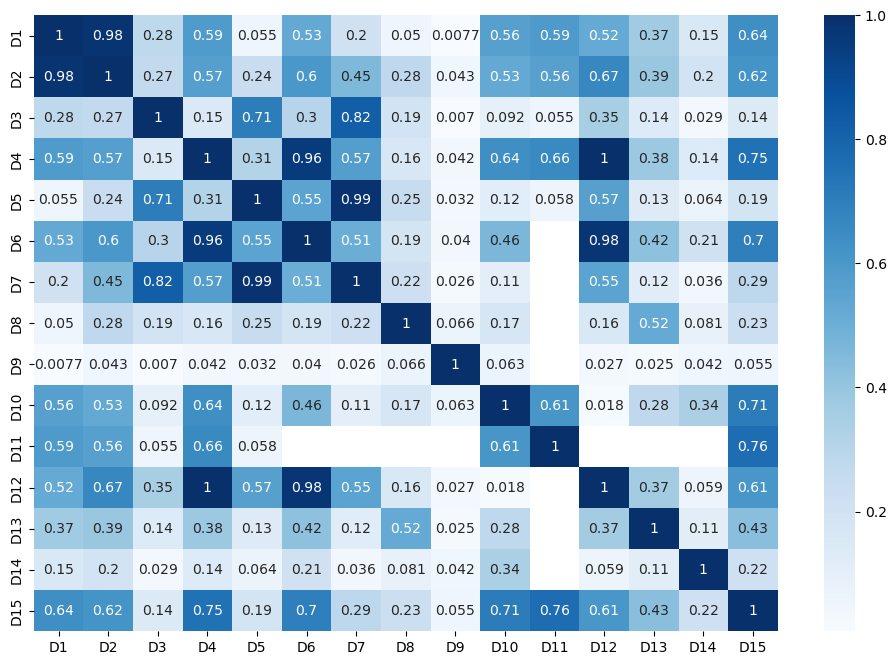

In [33]:
corr = train_transaction.loc[:, "D1":"D15"].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Blues", annot=True)

In [34]:
train_transaction['D1n'] =  train_transaction['D1'] -   train_transaction.TransactionDT/np.float32(24*60*60)

In [35]:
train_transaction['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [36]:
#Can remove columns with 90% missing values

def top_missing_cols(df,n=10,thresh=90):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

In [37]:
top_missing_cols(train_transaction, thresh=90)

There are 416 columns in this dataset with missing values.
There are 12 columns with missing percent values than 90%


,col,missing_percent
0,id_24,99.196159
1,id_25,99.130965
2,id_07,99.127070
3,id_08,99.127070
4,id_21,99.126393
5,id_26,99.125715
6,id_27,99.124699
7,id_23,99.124699
8,id_22,99.124699
9,dist2,93.628374


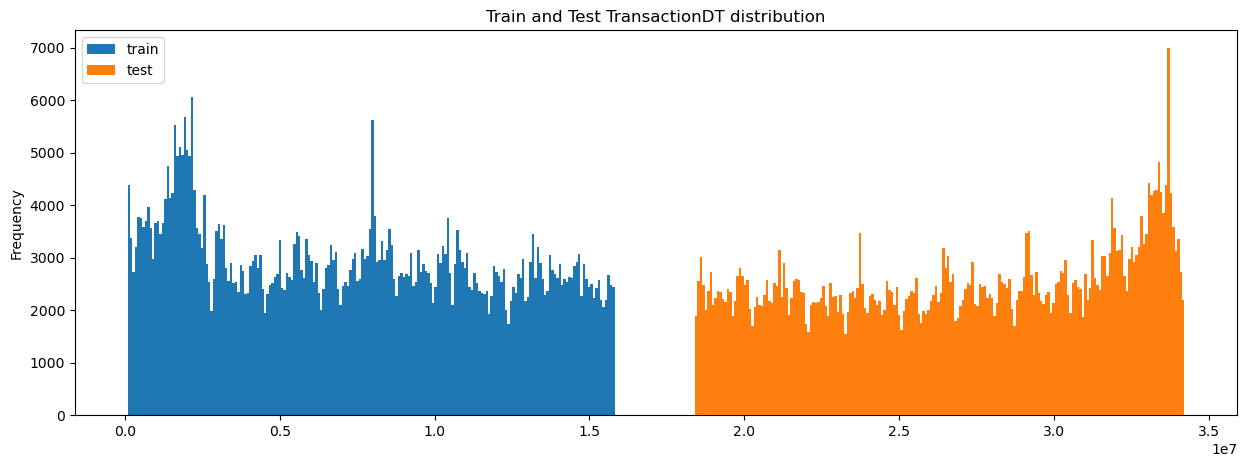

In [38]:
train_transaction['TransactionDT'].plot(kind='hist', figsize=(15, 5), label='train', bins=200, title='Train and Test TransactionDT distribution')
test_transaction['TransactionDT'].plot(kind='hist', label='test', bins=200)
plt.legend()
plt.show()

<Axes: title={'center': 'Train TransactionAmt distribution'}, ylabel='Frequency'>

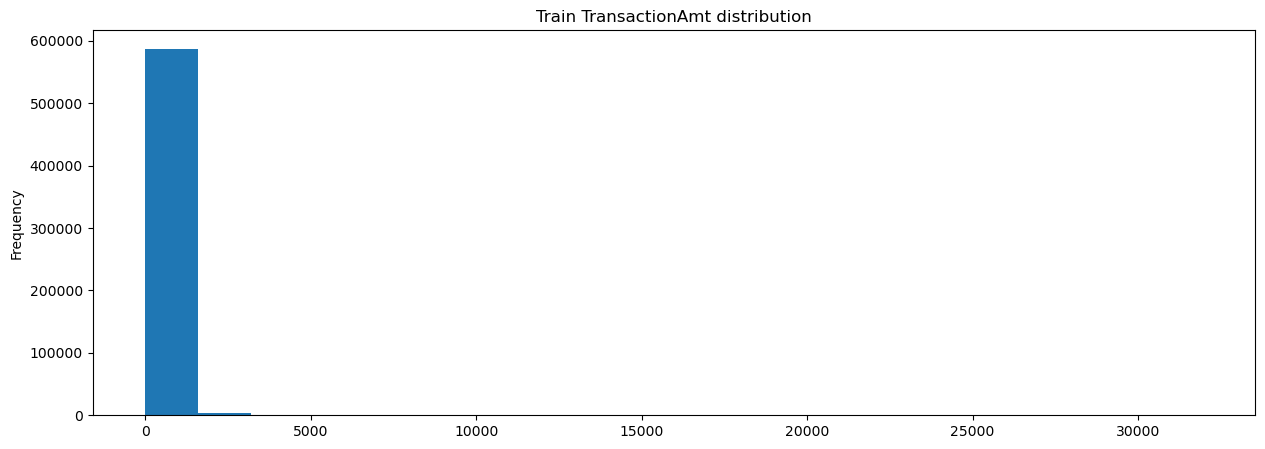

In [39]:
train_transaction['TransactionAmt'].plot(kind='hist', figsize=(15, 5), label='train', bins=20, title='Train TransactionAmt distribution')

<Axes: title={'center': 'Test TransactionAmt distribution'}, ylabel='Frequency'>

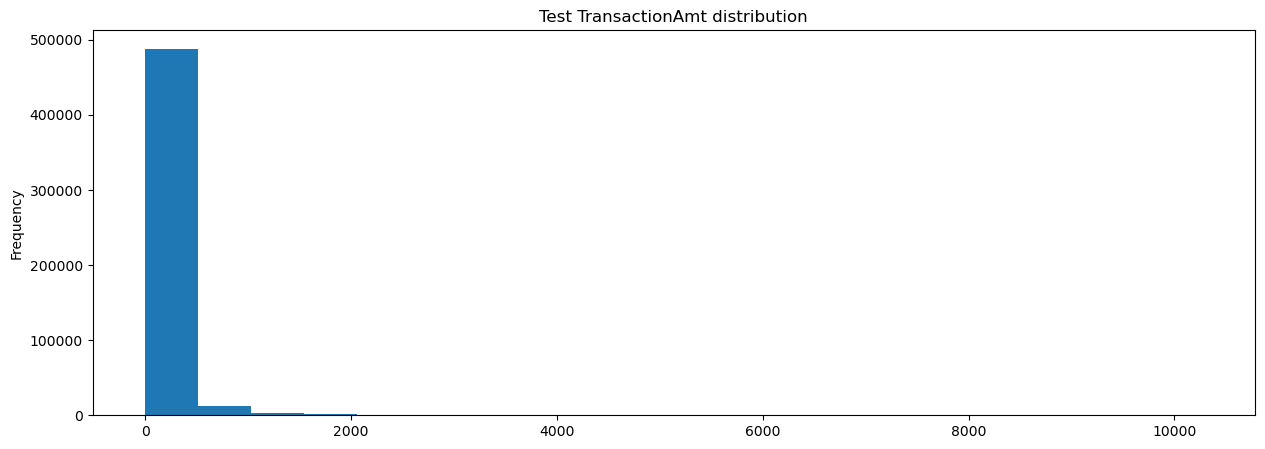

In [40]:
test_transaction['TransactionAmt'].plot(kind='hist', figsize=(15, 5), label='test', bins=20, title='Test TransactionAmt distribution')